Saving INSURANCE.csv to INSURANCE (2).csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-e78cfeaf3eb0>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['charges'],cluster_data[feature_to_cluster],c=plt.cm.viridis(i/(n_clusters-1)),label=f'Cluster{i+1}')


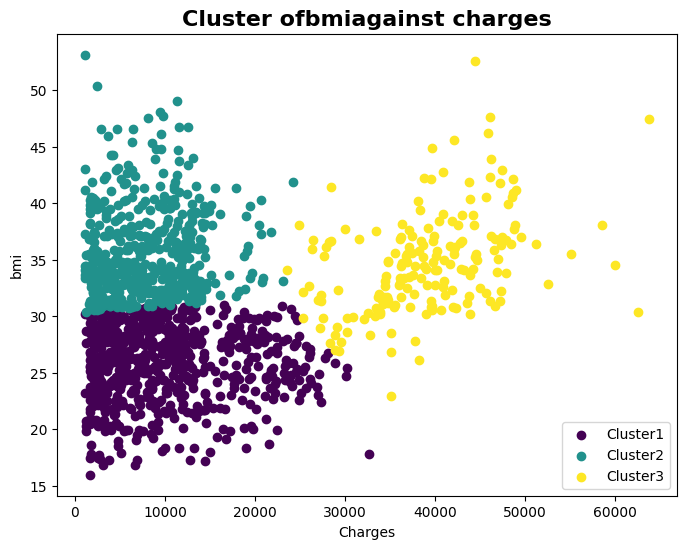

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
#Upload your dataset(CSV file)
upload =files.upload()
#read the upload csv file into data frame
data=pd.read_csv('/content/INSURANCE.csv')
#define the feature you want to cluster against'charge'
feature_to_cluster='bmi'
#replace with the feature of your choice
#convert 'smokers'a to numericnd 'sex' column to numerical values
label_encoder=LabelEncoder()
data['smoker']=label_encoder.fit_transform(data['smoker'])
data['sex']=label_encoder.fit_transform(data['sex'])
#create a feature matrix X
X=data[[feature_to_cluster,'charges']]
#standardize the data
scaler=StandardScaler()
X_std=scaler.fit_transform(X)
#apply K_Means clustering
n_clusters= 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
data['Cluster']=kmeans.fit_predict(X_std)
#create a title for the output
title=f'Cluster of{feature_to_cluster}against charges'
#visualize the cluster with a legend
plt.figure(figsize=(8,6))
for i in range(n_clusters):
  cluster_data=data[data['Cluster']==i]
  plt.scatter(cluster_data['charges'],cluster_data[feature_to_cluster],c=plt.cm.viridis(i/(n_clusters-1)),label=f'Cluster{i+1}')

plt.xlabel('Charges')
plt.ylabel(feature_to_cluster)
plt.title(title,fontsize=16,fontweight='bold')
plt.legend(loc='lower right')
plt.show()